# Example model: Boids
This code demonstrates a simple Boid's model used as an example in the article on agent-based models in the Encyclopedia of Measurement in the Social Sciences.

## Loading packages


In [2]:
import matplotlib.pyplot as plt
plt.style.use("opinionated_rc")
import colormaps as cmaps
import opinionated

import numpy as np
import matplotlib.pyplot as plt
from boids import simulate_boids, create_animation, create_trajectory_plot, save_animation,get_default_params

Now downloading: Roboto Condensed
Added new font as Roboto Condensed Light
Added new font as Roboto Condensed
Added new font as Roboto Condensed
Added new font as Roboto Condensed Black
Now downloading: Montserrat
Added new font as Montserrat Thin Light
Added new font as Montserrat Thin
Added new font as Montserrat Thin
Added new font as Montserrat Thin Black
Now downloading: Source Code Pro
Added new font as Source Code Pro ExtraLight Light
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight
Added new font as Source Code Pro ExtraLight Black
Now downloading: Fira Sans
Added new font as Fira Sans Light
Added new font as Fira Sans
Added new font as Fira Sans
Added new font as Fira Sans Black
Now downloading: Fira Sans Condensed
Added new font as Fira Sans Condensed Light
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed
Added new font as Fira Sans Condensed Black
Now downloading: IBM Plex Sans
Added new font as IBM Plex San

# Running the boids

 We run three simulations of the points model with 300 iterations each using different parameter sets, and then one additional simulation that has the same initial settings as the third one, except that the original positions of the Boids (the agents) are randomly jittered within a range of 5%.

Running 4 simulations...
Running simulation 1: param_set_1
  Simulation completed in 1.40 seconds


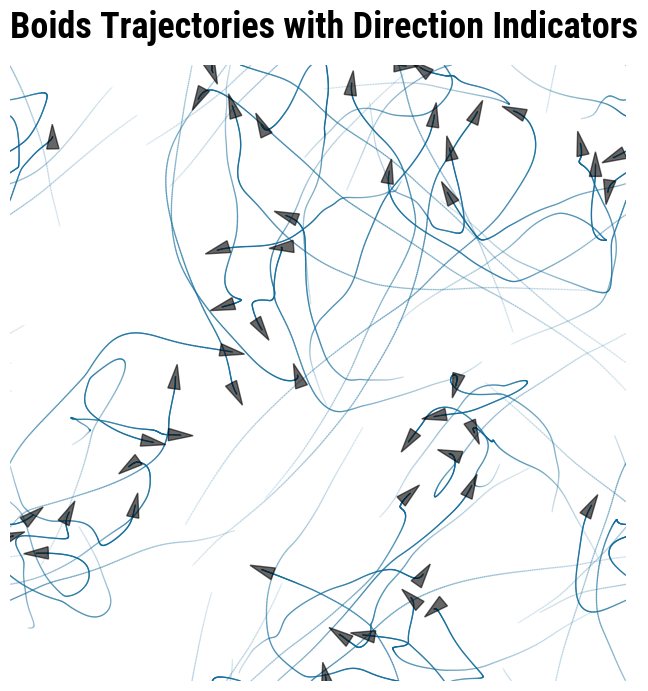

  Saved trajectory plot: graphics/boid_examples/param_set_1.png
  Animation created and saved in 11.91 seconds: graphics/boid_examples/param_set_1.gif
Running simulation 2: param_set_2
  Simulation completed in 1.67 seconds


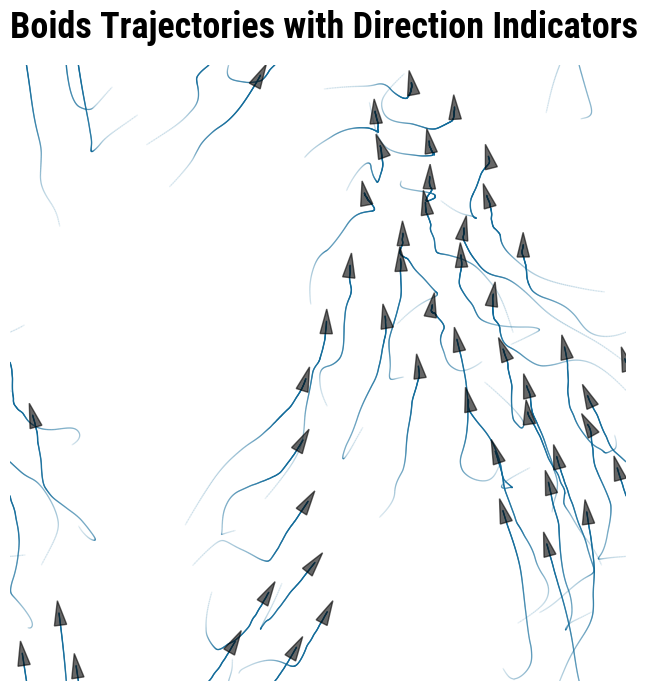

  Saved trajectory plot: graphics/boid_examples/param_set_2.png
  Animation created and saved in 10.83 seconds: graphics/boid_examples/param_set_2.gif
Running simulation 3: param_set_3
  Simulation completed in 4.87 seconds


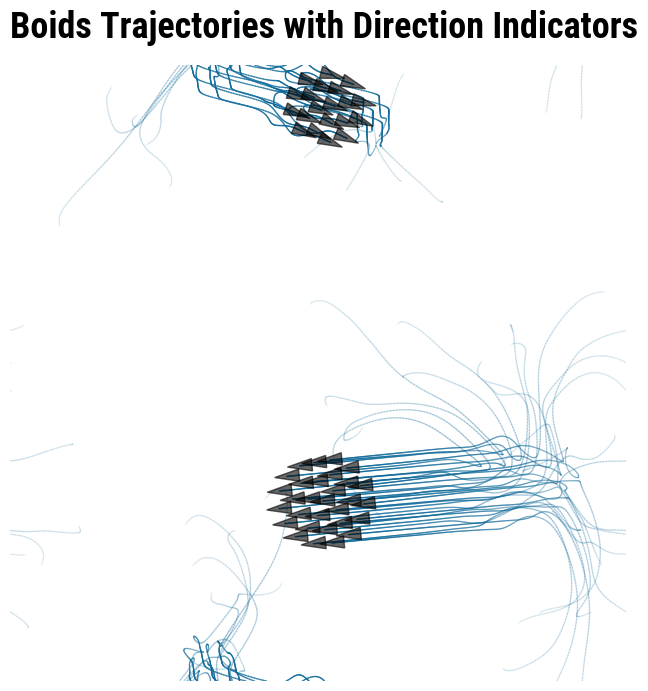

  Saved trajectory plot: graphics/boid_examples/param_set_3.png
  Animation created and saved in 10.43 seconds: graphics/boid_examples/param_set_3.gif
Running simulation 4: param_set_3_jittered
  Simulation completed in 3.67 seconds


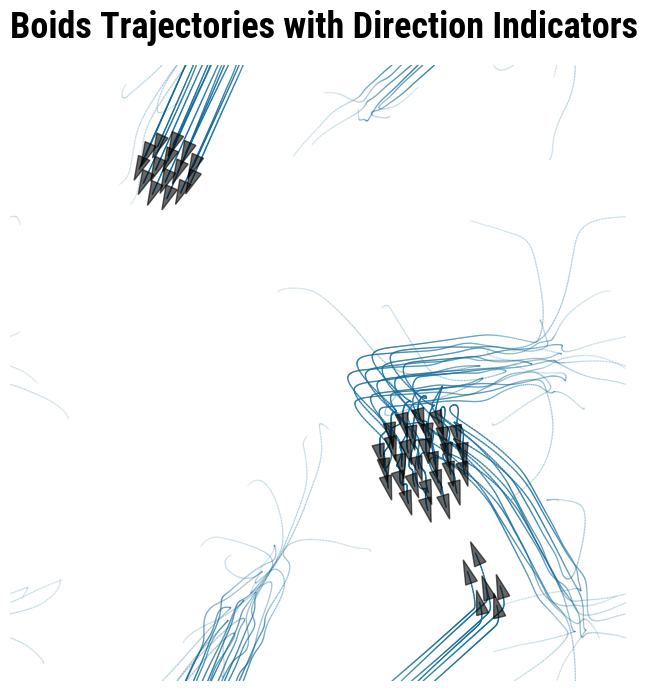

  Saved trajectory plot: graphics/boid_examples/param_set_3_jittered.png
  Animation created and saved in 10.42 seconds: graphics/boid_examples/param_set_3_jittered.gif
All simulations completed!
Output saved to graphics/boid_examples/


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from pathlib import Path

from boids import simulate_boids, create_trajectory_plot, create_animation, save_animation, get_default_params

def run_example_simulations(parameter_sets, output_dir="graphics/boid_examples"):
    """
    Run boids simulations with specified parameter sets and save the resulting plots and animations.
    
    Parameters:
    -----------
    parameter_sets : list of dict
        List of parameter dictionaries to use for simulations.
    output_dir : str, default="boid_examples"
        Directory where output images and animations will be saved.
    """
    # Create output directory if it doesn't exist
    Path(output_dir).mkdir(parents=True, exist_ok=True)
    
    # Set random seed for reproducibility
    np.random.seed(5)
    
    # Fixed simulation parameters
    num_boids = 50
    dim = 2
    area_size = 100
    num_iterations = 300
    dt = 0.1  # Smaller dt for smoother movement
    
    # Generate initial positions and velocities (same for first three simulations)
    initial_positions = np.random.rand(num_boids, dim) * area_size
    initial_velocities = (np.random.rand(num_boids, dim) - 0.5) * 10
    
    # Create a slightly jittered version for the fourth simulation
    jitter_scale = 0.05# 5% jitter
    jittered_positions = initial_positions + np.random.normal(0, jitter_scale * area_size, initial_positions.shape)
    # Ensure jittered positions stay within bounds
    jittered_positions = np.clip(jittered_positions, 0, area_size)
    
    # Lists to store all parameters and initial conditions
    all_params = parameter_sets.copy()
    all_params.append(parameter_sets[2].copy())  # Add the third parameter set again for the jittered version
    
    all_initial_positions = [initial_positions, initial_positions, initial_positions, jittered_positions]
    all_initial_velocities = [initial_velocities, initial_velocities, initial_velocities, initial_velocities]
    
    simulation_names = ["param_set_1", "param_set_2", "param_set_3", "param_set_3_jittered"]
    
    print(f"Running {len(all_params)} simulations...")
    
    # Run simulations for each parameter set
    for i, (params, pos, vel, name) in enumerate(zip(all_params, all_initial_positions, all_initial_velocities, simulation_names)):
        print(f"Running simulation {i+1}: {name}")
        
        # Create a parameter string for the filename
        param_string = name
        
        # Run simulation
        start_time = time.time()
        trajectories, velocities_history = simulate_boids(
            initial_positions=pos,
            initial_velocities=vel,
            num_iterations=num_iterations,
            dt=dt,
            params=params
        )
        sim_time = time.time() - start_time
        print(f"  Simulation completed in {sim_time:.2f} seconds")
        
        # Create and save trajectory plot
        fig_traj, ax_traj = create_trajectory_plot(
            trajectories,
            velocities_history,
            area_size=area_size,
            show_final_positions=True
        )
        
        # Save trajectory plot
        traj_filename = os.path.join(output_dir, f"{param_string}.png")
        fig_traj.savefig(traj_filename, dpi=500, bbox_inches='tight')
        plt.show()
        plt.close(fig_traj)
        print(f"  Saved trajectory plot: {traj_filename}")
        
        # Create and save animation
        start_time = time.time()
        fig_anim, anim = create_animation(
            trajectories,
            velocities_history,
            area_size=area_size,
            interval=50  # Faster animation frame rate
        )
        
        # Save animation
        anim_filename = os.path.join(output_dir, f"{param_string}.gif")
        save_animation(anim, filename=anim_filename, fps=20)  # Higher FPS for smoother animation
        plt.close(fig_anim)
        
        anim_time = time.time() - start_time
        print(f"  Animation created and saved in {anim_time:.2f} seconds: {anim_filename}")
    
    print(f"All simulations completed!")
    print(f"Output saved to {output_dir}/")


parameter_sets = [

    {
        'separation_radius': 10.0,
        'alignment_radius': 20.0,
        'cohesion_radius': 15.0,
        'separation_weight': 0.1,
        'alignment_weight': 0.005,
        'cohesion_weight': 0.005,
        'max_speed': 5.0,
        'area_size': 100
    },
    
    {
        'separation_radius': 10.0,
        'alignment_radius': 20.0,
        'cohesion_radius': 15.0,
        'separation_weight': 0.2,
        'alignment_weight': 0.04,
        'cohesion_weight': 0.005,
        'max_speed': 5.0,
        'area_size': 100
    },
        {
        'separation_radius': 15.0,
        'alignment_radius': 15.0,
        'cohesion_radius': 20.0,
        'separation_weight': 0.2,
        'alignment_weight': 0.09,
        'cohesion_weight': 0.09,
        'max_speed': 5.0,
        'area_size': 100
    },

]

# Run the simulations
run_example_simulations(parameter_sets)